In [1]:
import argparse, datetime, json
import data_cleaning as clean
import fitting as fit
import numpy as np
import os
import pandas as pd
import stat_metrics as stat
import utils

DATA_FILENAME = 'FLE7_2020.csv'
N_ITERS       = 1500

speed_bar     = 6.6

# Load behavioral data from CSV
data = pd.read_csv(DATA_FILENAME, delimiter=';', header=None).values
num_subjects = data.shape[0]

# Define the x-axis (0:pi/4:2*pi)
xax = utils.X_RANGE

# Sort properly the condition, according to the X_RANGE
data = clean.sort_condition(data)


In [2]:
xax

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714])

In [3]:
data = data*(speed_bar/1000)

In [4]:
data.shape

(9, 4, 8)

In [5]:
mean_values = np.nanmean(data, axis = 0)
mean_values.shape

(4, 8)

In [6]:
cd_label = ['[0, 0]', '[2, 0]', '[0, -2]', '[2, 2]']

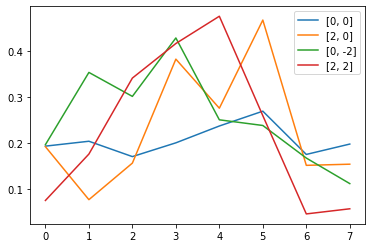

In [7]:
import matplotlib.pyplot as plt

for n, i in enumerate(mean_values):
    plt.plot(i, label = f'{cd_label[n]}')
plt.legend()

In [8]:
import numpy as np
from scipy import stats

# Create or open a text file for writing
with open('data\statistical_results.txt', 'w') as f:
    # Compare FP and FV for extremes (2.0°)
    f.write('Comparing VM-foveopetal (0°) and VM-foveofugal (180°) conditions for position [+2°, 0°]\n')
    yFF, yFP = data[:, 1, 0], data[:, 1, 4]
    yFPmean, yFFmean = np.average(yFP), np.average(yFF)
    t, p = stats.ttest_rel(yFP, yFF)
    f.write(u'    All:    \tyFPmean=%.2f  yFFmean=%.2f  \tt(%d)=%.2f  p=%.6f  %s\n' % 
            (yFPmean, yFFmean, data.shape[0], t, p, '***'*int(p<0.05)))

    f.write('\nComparing HM-foveopetal (270°) and HM-foveofugal (90°) conditions for position [0°, -2°]\n')
    yFF, yFP = data[:, 2, 6], data[:, 2, 2]
    yFPmean, yFFmean = np.average(yFP), np.average(yFF)
    t, p = stats.ttest_rel(yFP, yFF)
    f.write(u'    All:    \tyFPmean=%.2f  yFFmean=%.2f  \tt(%d)=%.2f  p=%.6f  %s\n' % 
            (yFPmean, yFFmean, data.shape[0], t, p, '***'*int(p<0.05)))

    # Compare FP and FV for extremes (2.0°)
    f.write('\nComparing 0° orientation and 180° orientation for position [0°, 0°]\n')
    yFF, yFP = data[:, 0, 0], data[:, 0, 4]
    yFPmean, yFFmean = np.average(yFP), np.average(yFF)
    t, p = stats.ttest_rel(yFP, yFF)
    f.write(u'    All:    \tyFPmean=%.2f  yFFmean=%.2f  \tt(%d)=%.2f  p=%.6f  %s\n' % 
            (yFPmean, yFFmean, data.shape[0], t, p, '***'*int(p<0.05)))

    # Compare FP and FV for extremes (2.0°)
    f.write('\nComparing VM-foveofugal (180°) for position [+2°, 0°] and VM-foveopetal (0°) for position [0°, 0°]\n')
    yFF, yFP = data[:, 1, 0], data[:, 0, 4]
    yFPmean, yFFmean = np.average(yFP), np.average(yFF)
    t, p = stats.ttest_rel(yFP, yFF)
    f.write(u'    All:    \tyFPmean=%.2f  yFFmean=%.2f  \tt(%d)=%.2f  p=%.6f  %s\n' % 
            (yFPmean, yFFmean, data.shape[0], t, p, '***'*int(p<0.05)))

    # Compare FP and FV for extremes (2.0°)
    f.write('\nComparing VM-foveofugal (180°) for position [+2°, 0°] and VM-foveopetal (180°) for position [0°, 0°]\n')
    yFF, yFP = data[:, 1, 0], data[:, 0, 0]
    yFPmean, yFFmean = np.average(yFP), np.average(yFF)
    t, p = stats.ttest_rel(yFP, yFF)
    f.write(u'    All:    \tyFPmean=%.2f  yFFmean=%.2f  \tt(%d)=%.2f  p=%.6f  %s\n' % 
            (yFPmean, yFFmean, data.shape[0], t, p, '***'*int(p<0.05)))

print("Results have been written to 'statistical_results.txt'")

Results have been written to 'statistical_results.txt'
